<a href="https://colab.research.google.com/github/YashikhaDhiman/CustomerChurnPrediction/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn Prediction

Problem statement was to create a machine learning model, which can be used to predict the churn rate or customers for a bank.

## creating the ML Model

Import the required python libraries for data preprocessing and data visualization.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [86]:
# load the train data set.
df = pd.read_csv("/content/drive/MyDrive/Customer_Churn_Prediction_Data/train_PDjVQMB.csv") 
df.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


In [14]:
# drop the ID column since we will not consider it for training the model
df.drop('ID',axis='columns',inplace=True)

In [15]:
# find the type of data that each column contains
df.dtypes

Age                     int64
Gender                 object
Income                 object
Balance               float64
Vintage                 int64
Transaction_Status      int64
Product_Holdings       object
Credit_Card             int64
Credit_Category        object
Is_Churn                int64
dtype: object

In [10]:
# lets have a look on the rows and columns in the data set
df.shape

(6650, 10)

In [16]:
# lets find more about our data, calculating the mathematical aspects of the data
df.describe()

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn
count,6650.000000,6.650000e+03,6650.000000,6650.000000,6650.000000,6650.000000
mean,41.130226,8.045954e+05,2.250226,0.515789,0.664361,0.231128
std,9.685747,5.157549e+05,1.458795,0.499788,0.472249,0.421586
min,21.000000,6.300000e+01,0.000000,0.000000,0.000000,0.000000
25%,34.000000,3.922642e+05,1.000000,0.000000,0.000000,0.000000
50%,40.000000,7.649386e+05,2.000000,1.000000,1.000000,0.000000
75%,47.000000,1.147124e+06,3.000000,1.000000,1.000000,0.000000
max,72.000000,2.436616e+06,5.000000,1.000000,1.000000,1.000000


In [18]:
# to check if we have any missing data in any row
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 6650 non-null   int64  
 1   Gender              6650 non-null   object 
 2   Income              6650 non-null   object 
 3   Balance             6650 non-null   float64
 4   Vintage             6650 non-null   int64  
 5   Transaction_Status  6650 non-null   int64  
 6   Product_Holdings    6650 non-null   object 
 7   Credit_Card         6650 non-null   int64  
 8   Credit_Category     6650 non-null   object 
 9   Is_Churn            6650 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 519.7+ KB


Below is the count of unique values which are present in each *row*

In [19]:
df.Age.value_counts()

39    306
38    284
36    282
40    277
35    271
33    267
34    256
41    256
37    248
42    233
32    226
43    224
45    218
31    217
44    213
30    198
46    193
47    189
29    179
28    150
49    149
48    149
50    147
51    135
52    132
27    128
53    111
26    101
55     97
54     94
56     88
57     73
60     62
59     58
58     55
25     49
62     40
63     35
65     35
64     34
24     33
61     32
66     30
23     25
68     16
67     15
22     12
71     10
69      9
70      4
72      3
21      2
Name: Age, dtype: int64

In [20]:
df.Gender.value_counts()

Male      3612
Female    3038
Name: Gender, dtype: int64

In [21]:
df.Income.value_counts()

10L - 15L        1885
5L - 10L         1847
Less than 5L     1573
More than 15L    1345
Name: Income, dtype: int64

In [22]:
df.Balance.value_counts()

117549.00     2
76122.00      2
131121.00     2
102123.00     2
138825.00     2
             ..
289348.92     1
1031298.48    1
242901.27     1
719339.85     1
826947.27     1
Name: Balance, Length: 6643, dtype: int64

In [23]:
df.Vintage.value_counts()

3    1405
1    1354
2    1328
4    1296
0     956
5     311
Name: Vintage, dtype: int64

In [24]:
df.Transaction_Status.value_counts()

1    3430
0    3220
Name: Transaction_Status, dtype: int64

In [25]:
df.Credit_Card.value_counts()

1    4418
0    2232
Name: Credit_Card, dtype: int64

In [26]:
df.Credit_Category.value_counts()

Poor       3076
Average    2043
Good       1531
Name: Credit_Category, dtype: int64

Below is the count of customers who have churned and who did not

In [27]:
df[df.Is_Churn == 0]

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
1,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
5,31,Female,Less than 5L,111026.79,4,1,1,0,Good,0
6,56,Male,Less than 5L,1072102.23,2,1,2,1,Average,0
9,32,Female,5L - 10L,770796.81,3,0,1,1,Poor,0
...,...,...,...,...,...,...,...,...,...,...
6643,57,Female,Less than 5L,974391.75,3,1,2,0,Poor,0
6644,38,Female,5L - 10L,37348.11,4,0,2,1,Average,0
6646,42,Female,5L - 10L,596286.54,3,1,2,1,Average,0
6647,29,Male,Less than 5L,979298.19,2,0,2,0,Poor,0


In [28]:
df[df.Is_Churn == 1]

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
3,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1
7,41,Female,10L - 15L,1587489.75,4,0,1,1,Poor,1
8,60,Female,10L - 15L,1465812.54,0,0,1,1,Poor,1
...,...,...,...,...,...,...,...,...,...,...
6625,43,Female,10L - 15L,793966.68,3,0,1,0,Poor,1
6632,52,Male,Less than 5L,1319181.84,2,0,2,1,Poor,1
6640,38,Female,5L - 10L,1308630.60,4,0,2,1,Poor,1
6645,61,Male,5L - 10L,1354526.19,4,1,2,1,Poor,1


Data *Visualization* and plotting

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


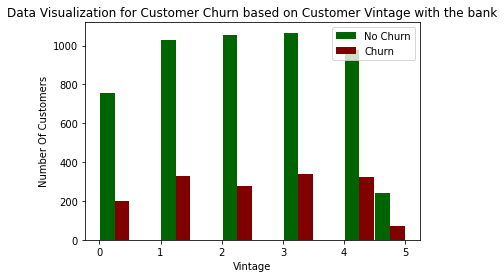

In [35]:
Vintage_NoChurn = df[df.Is_Churn==0].Vintage
Vintage_Churn = df[df.Is_Churn==1].Vintage

plt.xlabel("Vintage")
plt.ylabel("Number Of Customers")
plt.title("Data Visualization for Customer Churn based on Customer Vintage with the bank")

plt.hist([Vintage_NoChurn, Vintage_Churn], rwidth=0.95, color=['darkgreen','maroon'],label=['No Churn','Churn'])
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


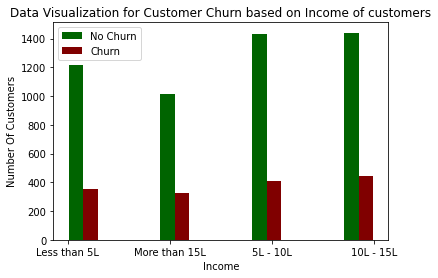

In [36]:
Income_NoChurn = df[df.Is_Churn==0].Income
Income_Churn = df[df.Is_Churn==1].Income

plt.xlabel("Income")
plt.ylabel("Number Of Customers")
plt.title("Data Visualization for Customer Churn based on Income of customers")

plt.hist([Income_NoChurn, Income_Churn], rwidth=0.95, color=['darkgreen','maroon'],label=['No Churn','Churn'])
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


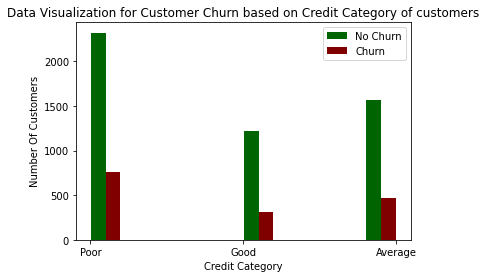

In [37]:
Credit_Category_NoChurn = df[df.Is_Churn==0].Credit_Category
Credit_Category_Churn = df[df.Is_Churn==1].Credit_Category

plt.xlabel("Credit Category")
plt.ylabel("Number Of Customers")
plt.title("Data Visualization for Customer Churn based on Credit Category of customers")

plt.hist([Credit_Category_NoChurn, Credit_Category_Churn], rwidth=0.95, color=['darkgreen','maroon'],label=['No Churn','Churn'])
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


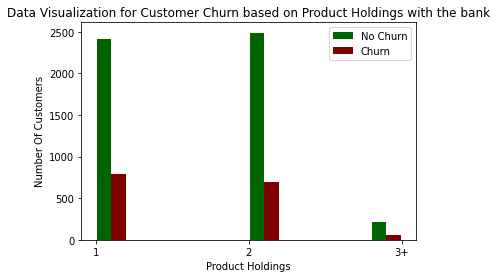

In [38]:
Product_Holdings_NoChurn = df[df.Is_Churn==0].Product_Holdings
Product_Holdings_Churn = df[df.Is_Churn==1].Product_Holdings

plt.xlabel("Product Holdings")
plt.ylabel("Number Of Customers")
plt.title("Data Visualization for Customer Churn based on Product Holdings with the bank")

plt.hist([Product_Holdings_NoChurn, Product_Holdings_Churn], rwidth=0.95, color=['darkgreen','maroon'],label=['No Churn','Churn'])
plt.legend()

After plotting the data, below is the step to find the columns of object type, because object type has to be chnaged into the numerical form, inorder to create the model

In [40]:
for column in df:
  if df[column].dtypes=='object':
     print(f'{column}: {df[column].unique()}') 

Gender: ['Female' 'Male']
Income: ['5L - 10L' 'Less than 5L' 'More than 15L' '10L - 15L']
Product_Holdings: ['1' '2' '3+']
Credit_Category: ['Average' 'Poor' 'Good']


In [87]:
# One Hot Encoding the columns which are in categorial data is represented as binary vectors
# Store the updated dataframe into df_v1
def one_hot_encode(df):     
    dataf = pd.get_dummies(data=df, columns=['Gender','Income','Product_Holdings','Credit_Category'])
    return(dataf)
df_v1 = one_hot_encode(df)
df_v1.columns

Index(['ID', 'Age', 'Balance', 'Vintage', 'Transaction_Status', 'Credit_Card',
       'Is_Churn', 'Gender_Female', 'Gender_Male', 'Income_10L - 15L',
       'Income_5L - 10L', 'Income_Less than 5L', 'Income_More than 15L',
       'Product_Holdings_1', 'Product_Holdings_2', 'Product_Holdings_3+',
       'Credit_Category_Average', 'Credit_Category_Good',
       'Credit_Category_Poor'],
      dtype='object')

In [42]:
df_v1.head()

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn,Gender_Female,Gender_Male,Income_10L - 15L,Income_5L - 10L,Income_Less than 5L,Income_More than 15L,Product_Holdings_1,Product_Holdings_2,Product_Holdings_3+,Credit_Category_Average,Credit_Category_Good,Credit_Category_Poor
0,36,563266.44,4,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0
1,53,875572.11,2,1,1,0,1,0,0,0,1,0,1,0,0,0,0,1
2,35,701607.06,2,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1
3,43,1393922.16,0,1,1,1,1,0,0,0,0,1,0,1,0,0,0,1
4,39,893146.23,1,1,1,1,1,0,0,0,0,1,1,0,0,0,1,0


In [71]:
# the data frame contains few columns which have data outside the range from 0 to 1, 
# therefore it is needed to scale that data in the range of 0 to 1
def cols_to_scale(df):
    cols_to_scale = ['Age','Balance','Vintage']

    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
    return(df)
cols_to_scale(df_v1)

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn,Gender_Female,Gender_Male,Income_10L - 15L,Income_5L - 10L,Income_Less than 5L,Income_More than 15L,Product_Holdings_1,Product_Holdings_2,Product_Holdings_3+,Credit_Category_Average,Credit_Category_Good,Credit_Category_Poor
0,0.294118,0.231148,0.8,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0
1,0.627451,0.359323,0.4,1,1,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0.274510,0.287925,0.4,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1
3,0.431373,0.572062,0.0,1,1,1,1,0,0,0,0,1,0,1,0,0,0,1
4,0.352941,0.366536,0.2,1,1,1,1,0,0,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6645,0.784314,0.555893,0.8,1,1,1,0,1,0,1,0,0,0,1,0,0,0,1
6646,0.411765,0.244700,0.6,1,1,0,1,0,0,1,0,0,0,1,0,1,0,0
6647,0.156863,0.401894,0.4,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1
6648,0.882353,0.162184,0.6,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1


In [88]:
# confirm if the data looks is preprocessed
for column in df_v1:
     print(f'{column}: {df_v1[column].unique()}')

ID: ['84e2fcc9' '57fea15e' '8df34ef3' ... 'd4075a95' '5855b142' '57b39511']
Age: [36 53 35 43 39 31 56 41 60 32 40 33 37 47 28 30 45 66 62 34 42 38 52 54
 27 68 58 59 25 26 48 29 44 67 49 63 55 46 65 57 23 50 51 71 69 61 64 24
 22 70 72 21]
Balance: [563266.44 875572.11 701607.06 ... 979298.19 395233.65 826947.27]
Vintage: [4 2 0 1 3 5]
Transaction_Status: [0 1]
Credit_Card: [0 1]
Is_Churn: [1 0]
Gender_Female: [1 0]
Gender_Male: [0 1]
Income_10L - 15L: [0 1]
Income_5L - 10L: [1 0]
Income_Less than 5L: [0 1]
Income_More than 15L: [0 1]
Product_Holdings_1: [1 0]
Product_Holdings_2: [0 1]
Product_Holdings_3+: [0 1]
Credit_Category_Average: [1 0]
Credit_Category_Good: [0 1]
Credit_Category_Poor: [0 1]


The Test and Train Split

In [47]:
X = df_v1.drop('Is_Churn',axis='columns')
y = df_v1['Is_Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

Import the python libraries used for creating an Artificial Neural Network and train it

In [48]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(17, input_shape=(17,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
167/167 [==============================] - 1s 2ms/step - loss: 0.5531 - accuracy: 0.7699
Epoch 2/100
167/167 [==============================] - 0s 2ms/step - loss: 0.5339 - accuracy: 0.7724
Epoch 3/100
167/167 [==============================] - 0s 2ms/step - loss: 0.5258 - accuracy: 0.7724
Epoch 4/100
167/167 [==============================] - 0s 2ms/step - loss: 0.5206 - accuracy: 0.7722
Epoch 5/100
167/167 [==============================] - 0s 2ms/step - loss: 0.5159 - accuracy: 0.7729
Epoch 6/100
167/167 [==============================] - 0s 2ms/step - loss: 0.5125 - accuracy: 0.7731
Epoch 7/100
167/167 [==============================] - 0s 2ms/step - loss: 0.5103 - accuracy: 0.7737
Epoch 8/100
167/167 [==============================] - 0s 2ms/step - loss: 0.5094 - accuracy: 0.7744
Epoch 9/100
167/167 [==============================] - 0s 2ms/step - loss: 0.5082 - accuracy: 0.7720
Epoch 10/100
167/167 [==============================] - 0s 2ms/step - loss: 0.5069 - accura

In [54]:
model.evaluate(X_test, y_test)

42/42 [==============================] - 0s 2ms/step - loss: 0.5495 - accuracy: 0.7466


[0.549476683139801, 0.746616542339325]

In [89]:
# make predictions for your test dataset
yp = model.predict(X_test)
yp[:5]

array([[0.4646863 ],
       [0.35134727],
       [0.15055403],
       [0.12398747],
       [0.28043124]], dtype=float32)

In [56]:
# conert the outcome preduction values to the binary vectors
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [57]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [58]:
y_test[:10]

6499    0
4932    0
5048    0
4308    0
4231    0
470     1
1799    0
362     0
5093    0
3593    0
Name: Is_Churn, dtype: int64

In [59]:
# lets calculate the accuracy which we got from our model
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.96      0.85      1004
           1       0.42      0.10      0.16       326

    accuracy                           0.75      1330
   macro avg       0.59      0.53      0.50      1330
weighted avg       0.68      0.75      0.68      1330



Text(69.0, 0.5, 'Truth')

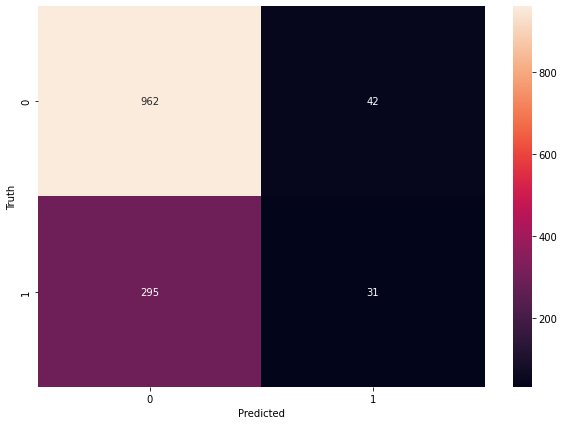

In [60]:
# Plot the graph for prediction and truth
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [61]:
y_test.shape

(1330,)

In [63]:
round((962+31)/(962+31+295+42),2)

0.75

In [64]:
round(962/(962+295),2)

0.77

In [65]:
round(31/(31+42),2)

0.42

In [66]:
round(962/(962+42),2)

0.96

In [67]:
round(31/(31+295),2)

0.1

## Testing the model with the provided test data set

In [90]:
# read the provided test data, create a sample submission data frame
testData = pd.read_csv('/content/drive/MyDrive/Customer_Churn_Prediction_Data/test_lTY72QC.csv')
testData.sample(5)
sample_submission = testData['ID']
sample_submission.head()

0    55480787
1    9aededf2
2    a5034a09
3    b3256702
4    dc28adb5
Name: ID, dtype: object

In [91]:
# preprocess the test data to put it as an input to the created model
testData.drop('ID',axis='columns',inplace=True)
testData = one_hot_encode(testData)
cols_to_scale(testData)

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Gender_Female,Gender_Male,Income_10L - 15L,Income_5L - 10L,Income_Less than 5L,Income_More than 15L,Product_Holdings_1,Product_Holdings_2,Product_Holdings_3+,Credit_Category_Average,Credit_Category_Good,Credit_Category_Poor
0,0.568627,0.413891,0.4,1,1,1,0,0,0,0,1,0,1,0,1,0,0
1,0.294118,0.139709,0.4,0,1,0,1,0,1,0,0,0,1,0,1,0,0
2,0.078431,0.179983,0.0,0,1,1,0,1,0,0,0,0,1,0,0,1,0
3,0.392157,0.011128,0.0,1,1,0,1,0,0,1,0,0,1,0,0,0,1
4,0.529412,0.453303,0.4,1,0,0,1,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2846,0.372549,0.549434,0.0,0,1,1,0,1,0,0,0,1,0,0,0,0,1
2847,0.529412,0.594567,0.0,1,1,1,0,0,0,0,1,0,1,0,1,0,0
2848,0.745098,0.451666,0.6,0,1,0,1,0,0,0,1,1,0,0,0,0,1
2849,0.254902,0.616980,0.4,0,1,1,0,0,1,0,0,1,0,0,0,0,1


In [92]:
# predict for the test data and convert the values into binary vectors
predictions = model.predict(testData)
pred = []
for element in predictions:
    if element > 0.5:
        pred.append(1)
    else:
        pred.append(0)
pred[:5]

[0, 0, 0, 0, 0]

In [84]:
sample_submission = sample_submission.to_frame()
sample_submission.insert(1, "Churn", pred, True)
sample_submission.head()

,ID,Churn
0,55480787,0
1,9aededf2,0
2,a5034a09,0
3,b3256702,0
4,dc28adb5,0


In [85]:
# Write the resultant dataframe to the file sample_submission.csv
sample_submission.to_csv('sample_submission.csv')